# ANSIMM 2022: Deep Learning and Dynamical Systems
Presenter: Christian M. Legaard

## Install dependencies

In [ ]:
!python -m pip install matplotlib tqdm torch torchvision torchaudio
# uncomment to install torch with GPU support
#!python -m pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

## Differential Equations
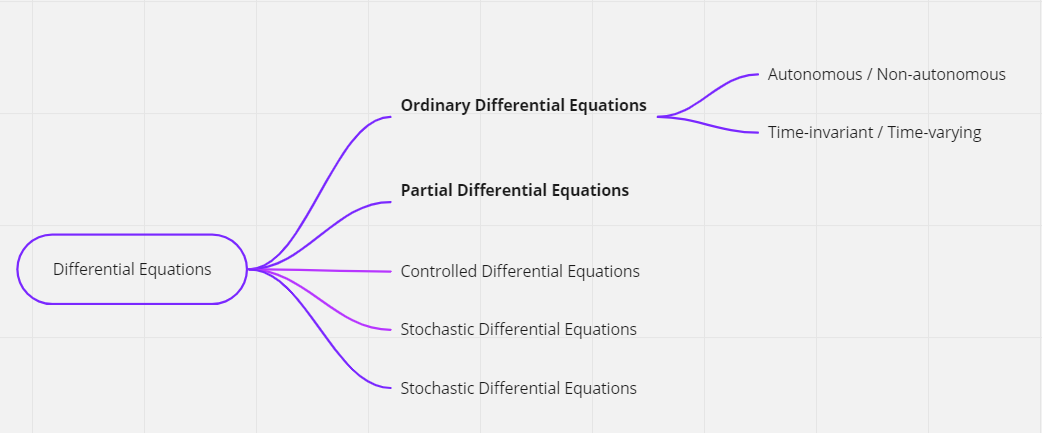
![pendulum.svg](data:image/svg+xml,attachment:2373ebc9-e71e-4b17-ae00-3b4b6c619bcd.svg)

### Ordinary Differential Equations


## Introduction to working with tensors in PyTorch

https://pytorch.org/tutorials/

In [4]:
import torch
a = torch.arange(9).reshape(3,3)
print(a)
print(a.shape)
print(a.device)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
torch.Size([3, 3])
cpu


In [5]:
b = a.clone()
print(a @ b)

tensor([[ 15,  18,  21],
        [ 42,  54,  66],
        [ 69,  90, 111]])


In [6]:
c = b.clone()
c[0,:] = 10
c

tensor([[10, 10, 10],
        [ 3,  4,  5],
        [ 6,  7,  8]])

### Gradients
Consider a 1-d regression problem $y=ax+b$, where a,b are scalar value parameters that we wish to estimate

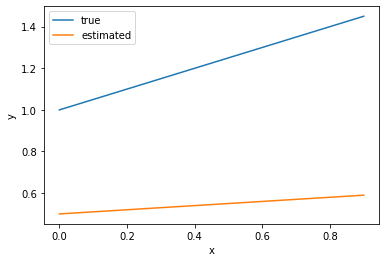

In [7]:
from tqdm import tqdm
from torch.linalg import norm
import matplotlib.pyplot as plt
a = 0.5
b = 1.0
x = torch.arange(0,1,0.1)
y = a*x+b

a_est = torch.tensor(0.1) # initial guess, 0-dimension tensor represents scalar
b_est = torch.tensor(0.5) # initial guess, 0-dimension tensor represents scalar
y_est = a_est*x+b_est

fig,ax = plt.subplots()
ax.plot(x,y,label="true")
ax.plot(x,y_est,label="estimated")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()

True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3302.62it/s]


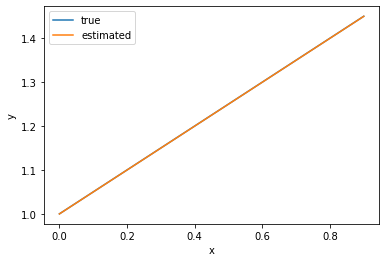

In [8]:
n_epochs = 10000 # number of training iterations
lr = 0.001 # learning rate
a_est.requires_grad = True
b_est.requires_grad = True

print(a_est.requires_grad)

for i in tqdm(range(n_epochs)):
    y_est = a_est * x + b_est
    loss = torch.linalg.norm(y - y_est) / x.shape[0]
    loss.backward()
    with torch.no_grad(): # disable tracking of gradients they are updated
        a_est -= lr*a_est.grad
        b_est -= lr*b_est.grad
        a_est.grad.zero_() # PyTorch accumulates gradients per default, we wish to clear this at each iteration
        b_est.grad.zero_()
        
y_est = y_est.detach()
fig,ax = plt.subplots()
ax.plot(x,y,label="true")
ax.plot(x,y_est,label="estimated")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()